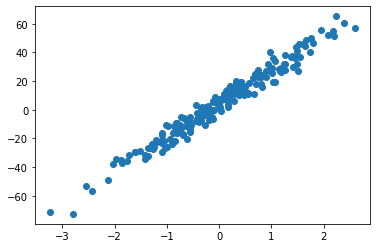

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, n_features=1, 
                       bias=5.0, noise=5.0, random_state=123)
y = np.expand_dims(y, axis=1)

plt.scatter(X, y)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    random_state=123)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160, 1)
(40, 1) (40, 1)


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers, utils

In [7]:
model = keras.Sequential()
model.add(layers.Dense(1, activation='linear', input_shape=(1, )))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


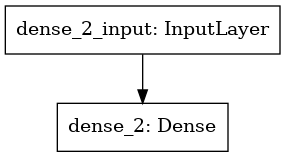

In [8]:
utils.plot_model(model)

In [9]:
optimizer = optimizers.SGD()
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
history = model.fit(x_train, y_train, epochs=40)

Epoch 1/40
5/5 [==============================] - 0s 2ms/step - loss: 522.2958 - mae: 18.3569 - mse: 522.2958
Epoch 2/40
5/5 [==============================] - 0s 1ms/step - loss: 420.3734 - mae: 16.4197 - mse: 420.3734
Epoch 3/40
5/5 [==============================] - 0s 1ms/step - loss: 339.9411 - mae: 14.8617 - mse: 339.9411
Epoch 4/40
5/5 [==============================] - 0s 1ms/step - loss: 273.9699 - mae: 13.3182 - mse: 273.9699
Epoch 5/40
5/5 [==============================] - 0s 1ms/step - loss: 222.6506 - mae: 12.0058 - mse: 222.6506
Epoch 6/40
5/5 [==============================] - 0s 1ms/step - loss: 181.7174 - mae: 10.8109 - mse: 181.7174
Epoch 7/40
5/5 [==============================] - 0s 2ms/step - loss: 148.7620 - mae: 9.7791 - mse: 148.7620
Epoch 8/40
5/5 [==============================] - 0s 2ms/step - loss: 122.8034 - mae: 8.8795 - mse: 122.8034
Epoch 9/40
5/5 [==============================] - 0s 2ms/step - loss: 102.2282 - mae: 8.0896 - mse: 102.2282
Epoch 10/40
5

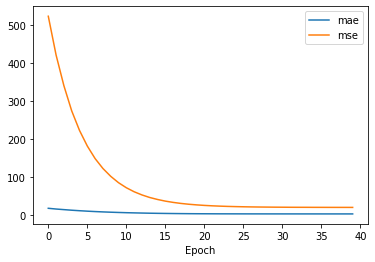

In [11]:
plt.plot(history.history['mae'])
plt.plot(history.history['mse'])
plt.xlabel('Epoch')
plt.legend(['mae', 'mse'])
plt.show();

In [10]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 21.8860 - mae: 3.9860 - mse: 21.8860


[21.886037826538086, 3.9860427379608154, 21.886037826538086]

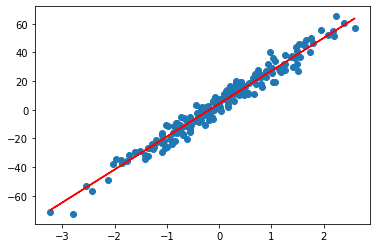

In [12]:
result = model.predict(X)

plt.scatter(X, y)
plt.plot(X, result, 'r')
plt.show()

In [13]:
model.layers

In [17]:
layer = model.layers[0]
print(layer.name)
layer = model.get_layer('dense_2')
print(layer.name)

dense_2
dense_2


In [18]:
weights, biases = layer.get_weights()
print(weights)
print(biases)

[[22.924948]]
[4.175327]


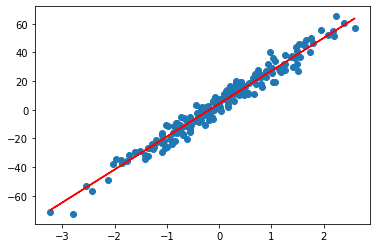

In [19]:
plt.scatter(X, y)
plt.plot(X, np.array(weights * X + biases), 'r')
plt.show()

실제 정답과 딥러닝 모델이 예측한 정답을 비교하여 실제 정답에 가깝게 예측할 수 있도록 스스로 학습합니다.